In [47]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
%cd "gdrive/MyDrive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 "


[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 '
/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 /yolov5


In [ ]:
cd "yolov5/"

/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 /yolov5


In [57]:
# %cd "Val/Val"
!unzip val.zip


Archive:  val.zip
   creating: val/
  inflating: val/image (10).txt      
  inflating: val/image (100).txt     
  inflating: val/image (101).txt     
  inflating: val/image (102).txt     
  inflating: val/image (103).txt     
  inflating: val/image (104).txt     
  inflating: val/image (105).txt     
  inflating: val/image (106).txt     
  inflating: val/image (107).txt     
  inflating: val/image (108).txt     
  inflating: val/image (109).txt     
  inflating: val/image (11).txt      
  inflating: val/image (110).txt     
  inflating: val/image (111).txt     
  inflating: val/image (112).txt     
  inflating: val/image (113).txt     
  inflating: val/image (114).txt     
  inflating: val/image (115).txt     
  inflating: val/image (116).txt     
  inflating: val/image (117).txt     
  inflating: val/image (118).txt     
  inflating: val/image (119).txt     
  inflating: val/image (12).txt      
  inflating: val/image (120).txt     
  inflating: val/image (121).txt     
  inflating: v

In [ ]:
!bash weights/download_weights.sh

100% 41.1M/41.1M [00:00<00:00, 77.9MB/s]

100% 90.2M/90.2M [00:01<00:00, 85.4MB/s]

100% 168M/168M [00:01<00:00, 95.9MB/s]



In [ ]:
import cv2
import torch
from PIL import Image

In [ ]:
net = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding autoShape... 
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CPU



In [ ]:
img = 'https://github.com/ultralytics/yolov5/raw/master/data/images/bus.jpg'
net.classes = [0] 
results = net(img)
results.print()  

image 1/1: 1080x810 4 persons
Speed: 255.2ms pre-process, 375.1ms inference, 11.1ms NMS per image at shape (1, 3, 640, 480)


In [ ]:
results.pandas().xyxy[0].to_json(orient = "records")  # JSON img1 predictions

'[{"xmin":54.9765777588,"ymin":393.9963378906,"xmax":225.5531616211,"ymax":879.5350952148,"confidence":0.8807719946,"class":0,"name":"person"},{"xmin":670.9166870117,"ymin":400.3520202637,"xmax":810.0,"ymax":878.3403320312,"confidence":0.8729637861,"class":0,"name":"person"},{"xmin":219.8755187988,"ymin":408.0208129883,"xmax":346.1413269043,"ymax":860.6669311523,"confidence":0.8642587066,"class":0,"name":"person"},{"xmin":0.1245199442,"ymin":552.2940063477,"xmax":76.412071228,"ymax":885.3545532227,"confidence":0.6630979776,"class":0,"name":"person"}]'

In [ ]:
# "./yolov5/runs/detect/exp/yt1s.mp4"

[Errno 2] No such file or directory: './yolov5/runs/detect/exp/'
/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 /yolov5/runs/detect/exp
yt1s.mp4


In [ ]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 '

In [ ]:
!pip install onnx
!pip install coremltools

     |████████████████████████████████| 12.2MB 6.0MB/s 
     |████████████████████████████████| 3.4MB 5.1MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp37-none-any.whl size=2458 sha256=b5051df22799309a40c7f619794bf5421b41aa1fcbb6100ad240d53d3ff1e378
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


In [ ]:
!python yolov5/models/export.py --weights yolov5s.pt --img 640 --batch 1

Namespace(batch_size=1, device='cpu', dynamic=False, half=False, img_size=[640, 640], inplace=False, optimize=False, simplify=False, train=False, weights='yolov5s.pt')
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients

PyTorch: starting from yolov5s.pt (14.8 MB)

TorchScript: starting export with torch 1.8.1+cu101...
/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 /yolov5/models/yolo.py:51: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.grid[i].shape[2:4] != x[i].shape[2:4] or self.onnx_dynamic:
TorchScript: export success, saved as yolov5s.torchscript.pt (29.4 MB)
ONNX: starting export with onnx 1.9.0...
ONNX: export success, saved as yolov5s.onnx (2

In [ ]:
# net = cv2.dnn.readNetFromONNX("yolov5s.onnx")

In [ ]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.8.1+cu101 CPU


In [60]:
cd ../..

/content/gdrive/My Drive/Colab Notebooks/VinBrain_Intern/W1/2. Human Detection with Yolo-V5 /yolov5


In [ ]:
%cat data.yaml

train: ./Train/Train/JPEGImages
val: ./Val/Val/JPEGImages

nc: 1
names: ['person']



In [ ]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])
    print(num_classes)

1


In [ ]:
%cat ./models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate ./models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes  # CHANGED HERE
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

(375, 500, 3)


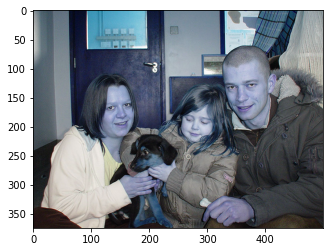

In [61]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("./Train/Train/images/image (101).jpg", cv2.IMREAD_COLOR)
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
!python train.py --img-size 375 500 --batch-size 10 --epochs 100 --data './data.yaml' --cfg ./models/custom_yolov5s.yaml --weights ''

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CPU

Namespace(adam=False, artifact_alias='latest', batch_size=10, bbox_interval=-1, bucket='', cache_images=False, cfg='./models/custom_yolov5s.yaml', data='./data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[375, 500], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp4', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=10, upload_dataset=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-12 07:34:08.344782: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda